In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import scipy as scp
import numpy as np

We will compare different 2D potentials as potential case studies for systems with $CV>1$.
We wish to find a known system with $CV\gg 1$ in order to demonstrate the power of the resetting method.

## Wolfe-Quapp potential

Retrieved from:
Quapp, W. A Growing String Method for the Reaction Pathway Defined by a Newton
Trajectory. J. Chem. Phys. 2005, 122, 174106.

The first checked potential is the Wolfe-Quapp potential:

$V(x,y) = x^4+y^4−2x^2−4y^2+xy+0.3x+0.1y$

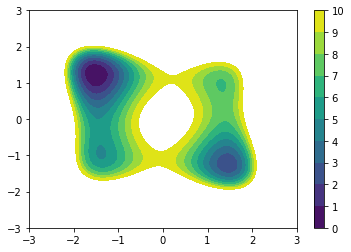

In [333]:
points = np.linspace(-3,3,100)
xs = []
ys = []
Vs = []
levels = np.linspace(0,10,11)
for xt in points:
    x = xt/1
    for yt in points:
        y = yt/1
        Vs.append(0.89424*(x**4+y**4-2*x**2-4*y**2+x*y+0.3*x+0.1*y))
        xs.append(xt)
        ys.append(yt)

surface = pd.DataFrame({"x":xs,"y":ys,"V":Vs})
surface.V -= surface.V.min() 
plt.tricontourf(surface.x,surface.y,surface.V/0.59616,levels=levels)
cbar = plt.colorbar(ticks=levels)

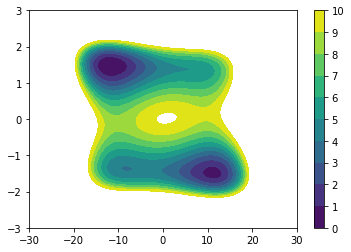

In [535]:
pointsx = np.linspace(-30,30,100)
pointsy = np.linspace(-3,3,100)
xs = []
ys = []
Vs = []
levels = np.linspace(0,10,11)
for xt in pointsx:
    x = xt/10
    for yt in pointsy:
        y = yt/1
        Vs.append(0.59616*1.5*(x**4+y**4-2*x**2-4*y**2+x*y+0.3*x+0.1*y))
        xs.append(xt)
        ys.append(yt)

surface = pd.DataFrame({"x":xs,"y":ys,"V":Vs})
surface.V -= surface.V.min() 
plt.tricontourf(surface.x,surface.y,surface.V/0.59616,levels=levels)
cbar = plt.colorbar(ticks=levels)

We actually used a slightly modified potential, in order to stretch the potential's coordinates and height:

$V(x,y) = C_h\left[(C_x x)^4+(C_y y)^4−2(C_x x)^2−4(C_y y)^2+C_x xC_yy+0.3C_x x+0.1C_yy\right]$

We defined the first passage time as the first time the particle's y coordinate changes its sign.

However, we didn't get $CV\gg 1$ when starting from the minima; the value of CV was about 1 at best.
We then tried a modification (written without the stretch parameters for simplicity):

$V(x,y) = x^4+y^4−2x^2−4y^2+xy+Cx$

For instance, for $C=2$:

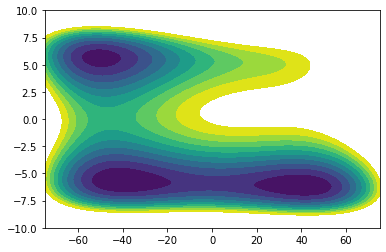

In [641]:
pointsx = np.linspace(-75,75,100)
pointsy = np.linspace(-10,10,100)
xs = []
ys = []
Vs = []
levels = np.linspace(0,10,11)
for xt in pointsx:
    x = xt/40
    for yt in pointsy:
        y = yt/4
        Vs.append(0.59616*1.5*(x**4+y**4-2*x**2-4*y**2+x*y+1.5*x+1.25*y))
        xs.append(xt)
        ys.append(yt)

surface = pd.DataFrame({"x":xs,"y":ys,"V":Vs})
surface.V -= surface.V.min() 
plt.tricontourf(surface.x,surface.y,surface.V/0.59616,levels=levels)

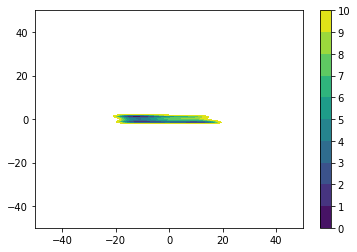

In [537]:
points = np.linspace(-50,50,150)
xs = []
ys = []
Vs = []
levels = np.linspace(0,10,11)
for x0 in points:
    x = x0/10
    for y0 in points:
        y = y0/1
        Vs.append(0.0003*(x**4+y**4-2*x**2-4*y**2+x*y+1.5*x+1*y))
        xs.append(x0)
        ys.append(y0)

surface = pd.DataFrame({"x":xs,"y":ys,"V":Vs})
surface.V -= surface.V.min() 
plt.tricontourf(surface.x,surface.y,surface.V/0.00025,levels=levels)
cbar = plt.colorbar(ticks=levels)

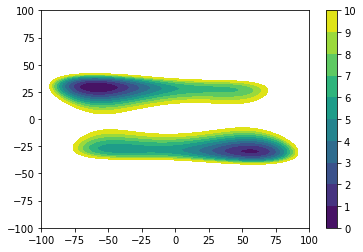

In [155]:
points = np.linspace(-100,100,150)
xs = []
ys = []
Vs = []
levels = np.linspace(0,10,11)
for x0 in points:
    x = x0/50
    for y0 in points:
        y = y0/20
        Vs.append(0.0005*(x**4+y**4-2*x**2-4*y**2+x*y+0.3*x+0.1*y))
        xs.append(x0)
        ys.append(y0)

surface = pd.DataFrame({"x":xs,"y":ys,"V":Vs})
surface.V -= surface.V.min() 
plt.tricontourf(surface.x,surface.y,surface.V/0.00025,levels=levels)
cbar = plt.colorbar(ticks=levels)

/tmp/ipykernel_55140/3268089768.py:6: RuntimeWarning: divide by zero encountered in log
  fes = - np.log(H)


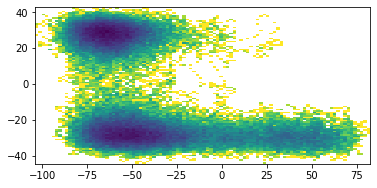

In [587]:
positions = np.loadtxt("WolfeQuappModificationB/presults/ps967682096067962",skiprows=1)
H, xedges, yedges = np.histogram2d(positions[:,0],positions[:,1],bins=[100,100])
# xs = 0.5*(xs[:-1]+xs[1:])
# ys = 0.5*(ys[:-1]+ys[1:])
H = H.T
fes = - np.log(H)
plt.imshow(fes, interpolation='nearest', origin='lower',extent=[xedges[0], xedges[-1], yedges[0], yedges[-1]])

Starting from the upper minimum, the results are similar to the unmodified version.
Starting from the lower minimum, we can get a CV higher than 1.

## Two Gaussian holes

Retrieved from Gimondi, Ilaria & Tribello, Gareth & Salvalaglio, Matteo. (2018). Building Maps in Collective Variable Space. The Journal of Chemical Physics. 149. 10.1063/1.5027528. 

Another potential is:

$V(x,y) = -(W_1 + W_2) + 4x^2 + 0.005y^2, W_i = A_i exp\left(− \frac{(x−x_i)^2}{(2\alpha_i^2)} − \frac{(y−y_i)^2}{(2\lambda_i^2)}\right)$

Using the original constants from the article, the potential is:

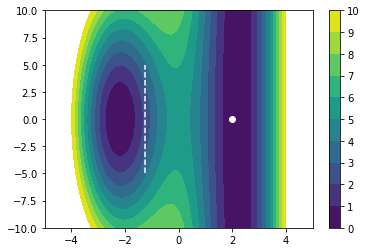

In [643]:
pointsy = np.linspace(-10,10,100)
pointsx = np.linspace(-5,5,100)
xs = []
ys = []
Vs = []
A = [50,50.1]
alphas = [1.6,1.6]
lambdas = [2000,10]
x0s = [2.5,-2.5]
y0s = [0,0]

levels = np.linspace(0,10,11)
for x in pointsx:
    for y in pointsy:
        W_1 = A[0]*np.exp(-(x-x0s[0])**2/(2*alphas[0]**2)-(y-y0s[0])**2/(2*lambdas[0]**2))
        W_2 = A[1]*np.exp(-(x-x0s[1])**2/(2*alphas[1]**2)-(y-y0s[1])**2/(2*lambdas[1]**2))
        Vs.append(0.59616*0.3*(-(W_1 + W_2) + 1*x**2 + 0.0005*y**2))
        xs.append(x)
        ys.append(y)

surface = pd.DataFrame({"x":xs,"y":ys,"V":Vs})
surface.V -= surface.V.min() 
plt.tricontourf(surface.x,surface.y,surface.V/0.59616,levels=levels)
cbar = plt.colorbar(ticks=levels)
plt.scatter(2,0,c="white")
lim = -1.25
plt.plot([lim,lim],[-5,5],linestyle="dashed",c="white")


Increasing $\lambda_2$ by an order of magnitude in order we get:

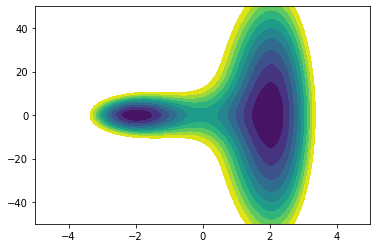

In [510]:
pointsx = np.linspace(-5,5,100)
pointsy = np.linspace(-50,50,100)
xs = []
ys = []
Vs = []
A = [50.1,50]
alphas = [1.6,1.6]
lambdas = [200,10]
x0s = [2.5,-2.5]
y0s = [0,0]

levels = np.linspace(0,20,11)
for x in pointsx:
    for y in pointsy:
        W_1 = A[0]*np.exp(-(x-x0s[0])**2/(2*alphas[0]**2)-(y-y0s[0])**2/(2*lambdas[0]**2))
        W_2 = A[1]*np.exp(-(x-x0s[1])**2/(2*alphas[1]**2)-(y-y0s[1])**2/(2*lambdas[1]**2))
        Vs.append(-(W_1 + W_2) + 2*x**2 + 0.005*y**2)
        xs.append(x)
        ys.append(y)

surface = pd.DataFrame({"x":xs,"y":ys,"V":Vs})
surface.V -= surface.V.min() 
plt.tricontourf(surface.x,surface.y,surface.V,levels=levels)


We may expect a large CV for the passage from positive to negative values of x.

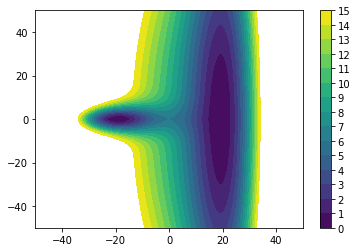

In [216]:
pointsx = np.linspace(-50,50,100)
pointsy = np.linspace(-50,50,100)
xs = []
ys = []
Vs = []
A = [50.1,50]
alphas = [13,13]
lambdas = [200,5]
x0s = [25,-25]
y0s = [0,0]

levels = np.linspace(0,15,16)
for x in pointsx:
    for y in pointsy:
        W_1 = A[0]*np.exp(-(x-x0s[0])**2/(2*alphas[0]**2)-(y-y0s[0])**2/(2*lambdas[0]**2))
        W_2 = A[1]*np.exp(-(x-x0s[1])**2/(2*alphas[1]**2)-(y-y0s[1])**2/(2*lambdas[1]**2))
        Vs.append(0.0001*(-(W_1 + W_2) + 0.04*x**2 + 0.002*y**2))
        xs.append(x)
        ys.append(y)

surface = pd.DataFrame({"x":xs,"y":ys,"V":Vs})
surface.V -= surface.V.min() 
plt.tricontourf(surface.x,surface.y,surface.V/0.00025,levels=levels)
cbar = plt.colorbar(ticks=levels)

/tmp/ipykernel_55140/2849833966.py:6: RuntimeWarning: divide by zero encountered in log
  fes = - np.log(H)


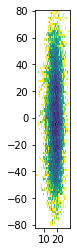

In [488]:
positions = np.loadtxt("2GaussianHoles/presults/ps8908576201981824",skiprows=1)
H, xedges, yedges = np.histogram2d(positions[:,0],positions[:,1],bins=[50,100])
# xs = 0.5*(xs[:-1]+xs[1:])
# ys = 0.5*(ys[:-1]+ys[1:])
H = H.T
fes = - np.log(H)
plt.imshow(fes, interpolation='nearest', origin='lower',extent=[xedges[0], xedges[-1], yedges[0], yedges[-1]])

(0.3125, 2.5)

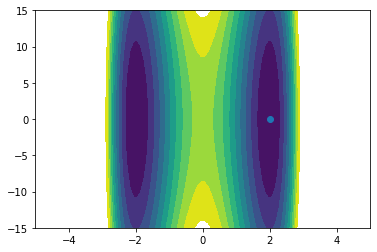

In [577]:
position = 2
depth = 5
B = 2*depth/position**2
A = 0.5*B/position**2


pointsx = np.linspace(-5,5,100)
pointsy = np.linspace(-15,15,100)
xs = []
ys = []
Vs = []
levels = np.linspace(0,10,11)
for xt in pointsx:
    x = xt/1
    for yt in pointsy:
        y = yt/1
        Vs.append(A*x**4-B*x**2+0.005*y**2)
        xs.append(xt)
        ys.append(yt)

surface = pd.DataFrame({"x":xs,"y":ys,"V":Vs})
surface.V -= surface.V.min() 
plt.tricontourf(surface.x,surface.y,surface.V/0.59616,levels=levels)
plt.scatter(2,0)
A,B

(0.0625, 0.5)